## Assignment 3

In this assignment, you will design a feed-forward neural network (also popularly known as a Multilayer Perceptron) classifier for the task. The ideal assignment to understand the working of neural networks would be to code up the backpropagation algorithm, taking into account variations in activation functions and loss functions.

### Required Imports
Imports:


1.  keras - Prediction Models
2.  numpy : Support for Pandas and calculations
3. Matplotlib and seaborn - For visualization (Plotting graphs)
4. Sklearn : For evaluation




In [2]:
import numpy as np
# Use command line arguements for Task 1 (sys.argv)
import sys

# the answer to life, universe and everything. also for reproducibility
np.random.seed(42)  
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils
from keras.optimizers import SGD
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline 

### Loading the Dataset
About Dataset:

MNIST dataset has the following features:

Dataset size 60,000 samples of handwritten images.

1. The size of each image is 28x28 pixels.
2. Each image has only 1 color channel, i.e., grayscale image.
3. Each pixel has value in the range of [0,255] where 0 represents black, and 255 represents white.
4. Each image has labeled from 0-9.

In [3]:
# Load pre-shuffled MNIST data into train and test sets
(X_train_1, train_labels_1), (X_test, test_labels_1) = mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


## Preparing Training and Validation data and Normalizing the pixel data
It requires a few steps:

MNIST provides a total 70,000 examples, divided into a test set of 10,000 images and a training set of 60,000 images. In this assignment, I curve out a validation set of 10,000 images from the MNIST training set, and use the remaining 50,000 examples for training.

The pixel data is also normalized. Each pixel values lies between [0,255]. This value range is too high and it will be difficult for any model to learn. The best approach is normalize the data. In this case, as the pixel value is in the known range it sufficient to scale the pixel values in range [0,1] by simply dividing the array by 255.

In [4]:
 # Preprocess input data
X_train_1 = X_train_1.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train_1 = X_train_1.astype('float32')
X_test = X_test.astype('float32')

X_train_1 /= 255
X_test /= 255

In [5]:
# Divides the dataset into train and validation sets
X_valid = X_train_1[50000:60000]
X_train = X_train_1[:50000]
print(X_train.shape[0], 'train samples')
print(X_valid.shape[0], 'validation samples')

50000 train samples
10000 validation samples


In [47]:
# Preprocess class labels
train_labels = np_utils.to_categorical(train_labels_1, 10)
test_labels = np_utils.to_categorical(test_labels_1, 10)
valid_labels = train_labels[50000:60000]
train_labels = train_labels[:50000]

### Buliding Model

In [7]:
# Define model architecture
model = Sequential()

model.add(Dense( 100, input_shape=(784,)))
model.add(Activation('relu'))

model.add(Dense(100))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

### Training
model.fit() is used to train the model. It takes training data, batch_size, no of epochs, validation data. There are several more parameters. I am are taking the epochs = 3 and batch size = 32. 

#### Loss Functions: 
Keras provides all of the well-known loss functions which work well for most of the time. I am discussing 3 loss function here.

1. binary_crossentropy: This loss function is used for the binary classification task. The single-node output layer is required. 0 and 1 is used for classification.

2. categorical_crossentropy: Used for Used for Multi-class classification
3. sparse_categorical_crossentropy: Used for Multi-class classification.

Difference between categorical_crossentropy and sparse_categorical_crossentropy is if your targets are one-hot encoded, use categorical_crossentropy. But if your targets are integers, use sparse_categorical_crossentropy.

In [14]:
# Compile model
sgd = SGD(lr=0.01) # Sets learning rate. 
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])
 
# Fit model on training data
model.fit(X_train, train_labels,batch_size=32, epochs=3, verbose=1)
 
# Evaluate model on test data.
score = model.evaluate(X_valid, valid_labels, verbose=0)
# This returns only a score, so you will need to use another function for 
# extracting predicted labels for your confusion matrix. Use this line for that:
classes = model.predict_classes(X_test, batch_size=32)
print(classes)
print('Validation score:', score[0])
print('Validation accuracy:', score[1])
f=open("results-<parameter_name>.csv","a")
f.write(sys.argv[1]+","+str(score[1])+"\n" )
f.close()


Epoch 1/3
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1343 - accuracy: 0.9601
Epoch 2/3
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1250 - accuracy: 0.9634
Epoch 3/3
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1167 - accuracy: 0.9655
[7 2 1 ... 4 5 6]
Validation score: 0.1269664615392685
Validation accuracy: 0.964900016784668


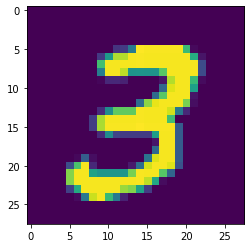

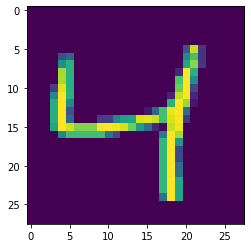

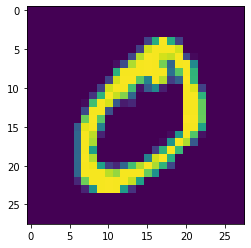

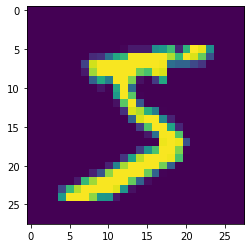

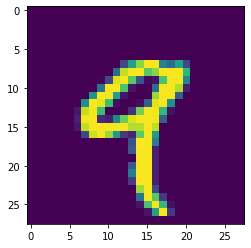

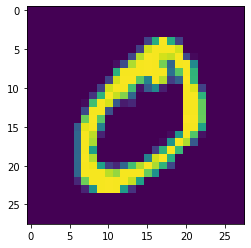

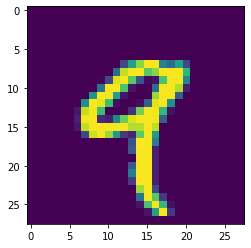

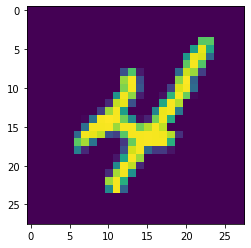

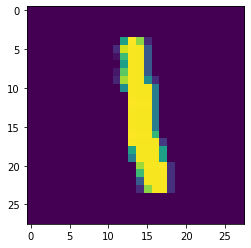

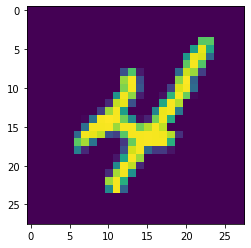

(10, 784)
[[3.81284099e-06 1.63422467e-08 8.91583622e-05 9.99717414e-01
  3.89885624e-11 1.06450570e-05 2.27254063e-10 1.32220555e-06
  8.94269469e-05 8.83098473e-05]
 [2.67994154e-04 1.05582665e-04 9.47761908e-03 5.68763213e-03
  9.33882892e-01 1.02023862e-03 2.34547933e-03 2.32850891e-02
  6.75440067e-04 2.32521147e-02]
 [9.99246240e-01 5.98922156e-09 6.71401678e-04 2.18753339e-05
  2.02497716e-07 2.76428750e-06 1.54422960e-05 1.12880043e-05
  1.12770604e-05 1.94912773e-05]
 [4.00830658e-07 2.69610132e-06 3.78836776e-05 3.87113206e-02
  9.40921386e-12 9.61237609e-01 8.45115711e-09 9.43654140e-06
  1.66527613e-07 3.76339500e-07]
 [6.27208976e-07 4.14763490e-05 8.34278751e-07 6.29684218e-05
  2.43696831e-02 9.11149691e-05 1.90619957e-07 6.68731751e-04
  7.61848642e-04 9.74002600e-01]
 [9.99246240e-01 5.98922156e-09 6.71401678e-04 2.18753339e-05
  2.02497716e-07 2.76428750e-06 1.54422960e-05 1.12880043e-05
  1.12770604e-05 1.94912773e-05]
 [6.27208976e-07 4.14763490e-05 8.34278751e-07 6

In [15]:
# A few random samples
#use_samples = [5, 38, 3939, 27389]
samples_to_predict = []

# Generate plots for samples
i = 0
for sample in classes:
  # Generate a plot
  reshaped_image = X_train[sample].reshape((28, 28))
  plt.imshow(reshaped_image)
  plt.show()
  # Add sample to array for prediction
  samples_to_predict.append(X_train[sample])
  i += 1
  if i == 10:
    break

# Convert into Numpy array
samples_to_predict = np.array(samples_to_predict)
print(samples_to_predict.shape)

# Generate predictions for samples
predictions = model.predict(samples_to_predict)
print(predictions)

# Generate arg maxes for predictions
classes = np.argmax(predictions, axis = 1)
print(classes)


### TASK 1 : Analysing performance

In this task, I will evaluate the performance of your network for varying values of hyperparameters. Keeping the rest of the values constant (and equal to the default values), adjust the values of parameters as described below. Find the performance (accuracy) of your model on the validation set and plot a trend graph for each of the following.

Batch size: 1, 2, 4, 8, 16, 32, 64, 128 (default 32).

Number of hidden layers: 1, 2, 4, 6, 8 (default 2).

Learning Rate: 0.01, 0.05, 0.1, 0.2, 0.4, 0.8 (default 0.01).

In [16]:
# Varying batch size
sgd = SGD(lr=0.01) # Sets learning rate. 
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])
 
# Fit model on training data
batch = [1, 2, 4, 8, 16, 32, 64, 128]
batch_par = []
batch_val = []
for b in batch:
  model.fit(X_train, train_labels,batch_size=b, epochs=3, verbose=1)
 
  # Evaluate model on test data.
  score = model.evaluate(X_valid, valid_labels, verbose=0)
  # This returns only a score, so you will need to use another function for 
  # extracting predicted labels for your confusion matrix. Use this line for that:
  classes = model.predict_classes(X_test, batch_size=b)
  print(classes)
  print('Validation score for batch ', b, ' is ', score[0])
  print('Validation accuracy:', score[1])
  batch_par.append(b)
  batch_val.append(score[1])

Epoch 1/3
50000/50000 [==============================] - 50s 1ms/step - loss: 0.1878 - accuracy: 0.9431
Epoch 2/3
50000/50000 [==============================] - 50s 999us/step - loss: 0.1046 - accuracy: 0.9680
Epoch 3/3
50000/50000 [==============================] - 50s 1ms/step - loss: 0.0788 - accuracy: 0.9754
[7 2 1 ... 4 5 6]
Validation score for batch  1  is  0.1077638566493988
Validation accuracy: 0.968500018119812
Epoch 1/3
25000/25000 [==============================] - 39s 2ms/step - loss: 0.0378 - accuracy: 0.9883
Epoch 2/3
25000/25000 [==============================] - 37s 1ms/step - loss: 0.0241 - accuracy: 0.9927
Epoch 3/3
25000/25000 [==============================] - 36s 1ms/step - loss: 0.0183 - accuracy: 0.9945
[7 2 1 ... 4 5 6]
Validation score for batch  2  is  0.0783177837729454
Validation accuracy: 0.9793999791145325
Epoch 1/3
12500/12500 [==============================] - 18s 1ms/step - loss: 0.0100 - accuracy: 0.9976
Epoch 2/3
12500/12500 [========================

In [17]:
# Varying learning rate

# Fit model on training data
l_rate = [0.01, 0.05, 0.1, 0.2, 0.4, 0.8]
lr_par = []
lr_val = []
for l in l_rate:
  model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr = l),
              metrics=['accuracy'])
  model.fit(X_train, train_labels,batch_size=32, epochs=3, verbose=1)
 
  # Evaluate model on test data.
  score = model.evaluate(X_valid, valid_labels, verbose=0)
  # This returns only a score, so you will need to use another function for 
  # extracting predicted labels for your confusion matrix. Use this line for that:
  classes = model.predict_classes(X_test, batch_size=32)
  print(classes)
  print('Validation score for learning rate ', l, ' is', score[0])
  print('Validation accuracy:', score[1])
  lr_par.append(l)
  lr_val.append(score[1])

Epoch 1/3
1563/1563 [==============================] - 2s 2ms/step - loss: 0.0022 - accuracy: 0.9999
Epoch 2/3
1563/1563 [==============================] - 2s 2ms/step - loss: 0.0021 - accuracy: 0.9999
Epoch 3/3
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0021 - accuracy: 0.9999
[7 2 1 ... 4 5 6]
Validation score for learning rate  0.01  is 0.08221888542175293
Validation accuracy: 0.9818000197410583
Epoch 1/3
1563/1563 [==============================] - 2s 2ms/step - loss: 0.0023 - accuracy: 0.9998
Epoch 2/3
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0021 - accuracy: 0.9999
Epoch 3/3
1563/1563 [==============================] - 2s 2ms/step - loss: 0.0019 - accuracy: 0.9999
[7 2 1 ... 4 5 6]
Validation score for learning rate  0.05  is 0.08507594466209412
Validation accuracy: 0.982200026512146
Epoch 1/3
1563/1563 [==============================] - 2s 2ms/step - loss: 0.0021 - accuracy: 0.9998
Epoch 2/3
1563/1563 [===========================

In [18]:
# Varying hidden layer 
# Fit model on training data
h_layer = [1, 2, 4, 6, 8]
hl_par = []
hl_val = []
for h in h_layer:
  model = Sequential()

  model.add(Dense( 100, input_shape=(784,)))
  model.add(Activation('relu'))
  for i in range(h):
    model.add(Dense(100))
    model.add(Activation('relu'))

  model.add(Dense(10))
  model.add(Activation('softmax'))
  sgd = SGD(lr=0.01) # Sets learning rate. 
  model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])
  model.fit(X_train, train_labels,batch_size=32, epochs=3, verbose=1)
  
  # Evaluate model on test data.
  score = model.evaluate(X_valid, valid_labels, verbose=0)
  # This returns only a score, so you will need to use another function for 
  # extracting predicted labels for your confusion matrix. Use this line for that:
  classes = model.predict_classes(X_test, batch_size=32)
  print(classes)
  print('Validation score for hidden layer ', h, ' is', score[0])
  print('Validation accuracy:', score[1])
  hl_par.append(h)
  hl_val.append(score[1])

Epoch 1/3
1563/1563 [==============================] - 2s 2ms/step - loss: 0.7114 - accuracy: 0.8123
Epoch 2/3
1563/1563 [==============================] - 2s 1ms/step - loss: 0.3211 - accuracy: 0.9084
Epoch 3/3
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2665 - accuracy: 0.9233
[7 2 1 ... 4 5 6]
Validation score for hidden layer  1  is 0.23175029456615448
Validation accuracy: 0.9341999888420105
Epoch 1/3
1563/1563 [==============================] - 3s 2ms/step - loss: 0.8180 - accuracy: 0.7676
Epoch 2/3
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3034 - accuracy: 0.9116
Epoch 3/3
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2424 - accuracy: 0.9299
[7 2 1 ... 4 5 6]
Validation score for hidden layer  2  is 0.1981097012758255
Validation accuracy: 0.944599986076355
Epoch 1/3
1563/1563 [==============================] - 3s 2ms/step - loss: 0.9169 - accuracy: 0.7200
Epoch 2/3
1563/1563 [==============================] - 3s

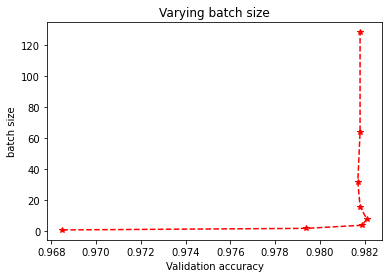

In [19]:
plt.plot(batch_val, batch_par, 'r*--')
#no need to write plt.show() as we have imported %matplotlib inline
plt.xlabel('Validation accuracy')
plt.ylabel('batch size')
plt.title('Varying batch size')
plt.savefig('batch-size.png')

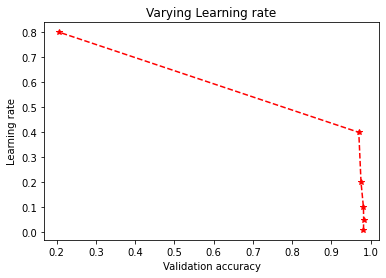

In [20]:
plt.plot(lr_val, lr_par, 'r*--')
#no need to write plt.show() as we have imported %matplotlib inline
plt.xlabel('Validation accuracy')
plt.ylabel('Learning rate')
plt.title('Varying Learning rate')
plt.savefig('learning-rate.png')

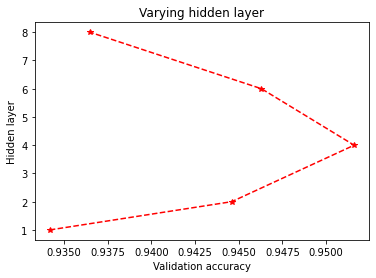

In [21]:
plt.plot(hl_val, hl_par, 'r*--')
#no need to write plt.show() as we have imported %matplotlib inline
plt.xlabel('Validation accuracy')
plt.ylabel('Hidden layer')
plt.title('Varying hidden layer')
plt.savefig('num-hidden-layers.png')

In [48]:
#Best Model based on the hyper parameter tuning

# Define model architecture
model = Sequential()

model.add(Dense( 100, input_shape=(784,)))
model.add(Activation('relu'))
for i in range(4):
  model.add(Dense(100))
  model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

# Compile model
sgd = SGD(lr=0.05) # Sets learning rate. 
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])
 
# Fit model on training data
model.fit(X_train, train_labels,batch_size=8, epochs=3, verbose=1)
 
# Evaluate model on test data.
score = model.evaluate(X_valid, valid_labels, verbose=0)
# This returns only a score, so you will need to use another function for 
# extracting predicted labels for your confusion matrix. Use this line for that:
classes = model.predict_classes(X_test, batch_size=8)
print(classes)
print('Validation score:', score[0])
print('Validation accuracy:', score[1])


Epoch 1/3
6250/6250 [==============================] - 9s 1ms/step - loss: 0.3175 - accuracy: 0.9034
Epoch 2/3
6250/6250 [==============================] - 8s 1ms/step - loss: 0.1429 - accuracy: 0.9567
Epoch 3/3
6250/6250 [==============================] - 8s 1ms/step - loss: 0.1010 - accuracy: 0.9696
[7 2 1 ... 4 5 6]
Validation score: 0.11261424422264099
Validation accuracy: 0.968500018119812


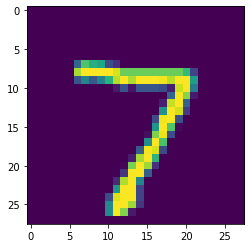

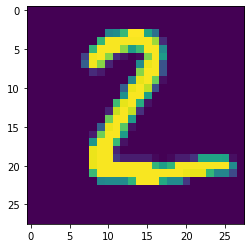

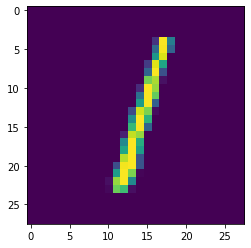

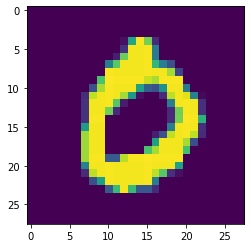

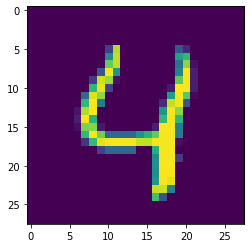

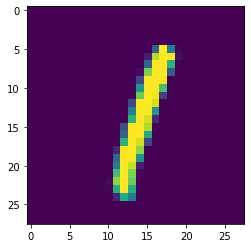

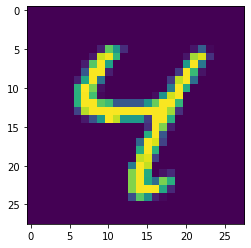

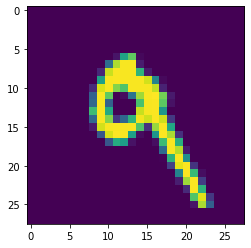

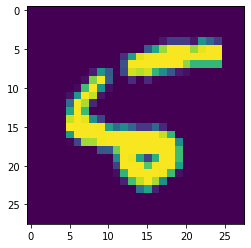

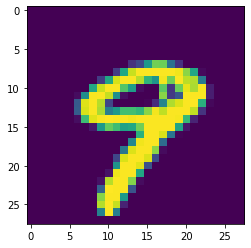

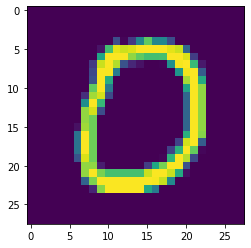

[[2.51149430e-07 2.88021556e-06 1.88689392e-05 6.01972715e-06
  4.10287839e-06 4.36071552e-08 1.35157663e-09 9.99934316e-01
  6.06108230e-08 3.33358294e-05]
 [4.80976014e-05 1.01113948e-03 9.78432655e-01 1.75697636e-02
  1.04152015e-04 1.44277597e-04 1.29556007e-04 1.36742671e-03
  1.18343160e-03 9.55329324e-06]
 [4.00893259e-06 9.92076159e-01 1.88560865e-04 7.81863200e-05
  2.64793896e-04 1.21812973e-05 8.38867436e-06 4.27777367e-03
  3.03596561e-03 5.40765832e-05]
 [9.99994278e-01 2.28860972e-10 1.71267618e-06 8.50340314e-08
  3.94639727e-07 2.02443204e-07 2.73165438e-06 6.14863751e-08
  1.85441493e-07 4.56603658e-07]
 [3.74472074e-06 9.53401809e-07 5.62553250e-05 5.67868540e-07
  9.99830604e-01 9.81082167e-07 2.11566330e-05 4.14005226e-05
  2.42110991e-06 4.19976168e-05]
 [8.77405171e-08 9.97668326e-01 1.05785111e-05 2.32107527e-06
  3.28376664e-05 1.77582663e-07 1.09445047e-07 2.03810912e-03
  2.42813432e-04 4.70148871e-06]
 [2.95415180e-06 3.23752356e-05 2.48313503e-04 3.60959211e

In [35]:
samples_to_predict = []
i = 0
# Generate plots for samples
for c in X_test:
  # Generate a plot
  reshaped_image = c.reshape((28, 28))
  plt.imshow(reshaped_image)
  plt.show()
  # Add sample to array for prediction
  samples_to_predict.append(c)
  i += 1
  if i > 10:
    break

# Convert into Numpy array
samples_to_predict = np.array(samples_to_predict)

# Generate predictions for samples
predictions = model.predict(samples_to_predict)
print(predictions)

# Generate arg maxes for predictions
classes = np.argmax(predictions, axis = 1)
print(classes)

####TASK 1 observation in text file

1. Write a brief description of the variation observed in each graph and your hypothesis explaining the variation in your own words. 

The number of examples from the training dataset used in the estimate of the error gradient is called the batch size and is an important hyperparameter that influences the dynamics of the learning algorithm. Batch size controls the accuracy of the estimate of the error gradient when training neural networks.There is a tension between batch size and the speed and stability of the learning process.Normally, a smaller batch sizes is preferred because smaller batch sizes are noisy, offering a regularizing effect and lower generalization error. Also, smaller batch sizes make it easier to fit one batch worth of training data in memory (i.e. when using a GPU).In my case, th accuracy of the model increased from 1 to 8, and from 16 to 128 it stayed more or less the same. So, accuracy is best at batch size = 8.

One of the important things is the selection of the learning rate. If the learning rate is too high, the loss may not converge, and if it is too low, the training will be slow. So it is important to select the reasonably fair value of learning rate. One of the good value to start with is 0.01. If it doesn't work, then other higher or lower values can be tried. In my case, from 0.01 to 0.05 the increase in learning rate increases the accuracy. But from 0.1 to 0.8, the learning rate decreased gradually. So, accuracy is best at learning rate = 0.05.

Increasing the number of hidden layers might improve the accuracy or might not, Increasing the number of hidden layers much more than the sufficient number of layers will cause accuracy in the test set to decrease. It will cause your network to overfit to the training set, that is, it will learn the training data, but it won't be able to generalize to new unseen data. In my case, the accuracy increased from 1 to 4, and from 6 to 8, the accuracy reduced. So, accuracy is best at no. of hidden layers = 4.


2. Should accuracy alone be the criterion deciding a parameter setting? What could be other considerations in practice?

Accuracy is one metric for evaluating classification models. Informally, accuracy is the fraction of predictions our model got right. Accuracy alone doesn't tell the full story when you're working with a class-imbalanced data set, where there is a significant disparity between the number of positive and negative labels. To fully evaluate the effectiveness of a model, you must examine both precision and recall. Unfortunately, precision and recall are often in tension. That is, improving precision typically reduces recall and vice versa. TO solve this, F-score is used. The F1 score is the harmonic mean of the precision and recall. 

## Task 2: Confusion matrix
For this exercise, set the hyperparameters of the network to the values that resulted in the maximum validation accuracy in Task 1. Train the model and evaluate the performance of your model on the validation set. Now use the predictions of your model and the true labels of the validation set to create the 10x10 confusion matrix.


In [61]:
val_p = classes
error = 0
confusion_matrix = np.zeros([10,10])
for i in range(X_test.shape[0]):
    confusion_matrix[test_labels_1[i],val_p[i]] += 1
    if test_labels_1[i]!=val_p[i]:
        error +=1  
print("Confusion Matrix: \n\n" ,confusion_matrix)
print("\nErrors in validation set: " ,error)
print("\nError Persentage : " ,(error*100)/val_p.shape[0])
print("\nAccuracy : " ,100-(error*100)/val_p.shape[0])
print("\nValidation set Shape :",val_p.shape[0])

Confusion Matrix: 

 [[9.670e+02 0.000e+00 6.000e+00 2.000e+00 0.000e+00 1.000e+00 0.000e+00
  1.000e+00 2.000e+00 1.000e+00]
 [0.000e+00 1.117e+03 5.000e+00 6.000e+00 0.000e+00 0.000e+00 2.000e+00
  0.000e+00 5.000e+00 0.000e+00]
 [2.000e+00 1.000e+00 1.005e+03 1.500e+01 1.000e+00 0.000e+00 2.000e+00
  3.000e+00 3.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 6.000e+00 9.940e+02 0.000e+00 2.000e+00 0.000e+00
  2.000e+00 5.000e+00 1.000e+00]
 [1.000e+00 1.000e+00 7.000e+00 0.000e+00 9.430e+02 0.000e+00 6.000e+00
  1.000e+00 3.000e+00 2.000e+01]
 [5.000e+00 0.000e+00 0.000e+00 2.500e+01 1.000e+00 8.430e+02 7.000e+00
  1.000e+00 8.000e+00 2.000e+00]
 [6.000e+00 2.000e+00 7.000e+00 1.000e+00 3.000e+00 9.000e+00 9.250e+02
  0.000e+00 5.000e+00 0.000e+00]
 [1.000e+00 7.000e+00 1.900e+01 2.300e+01 2.000e+00 0.000e+00 1.000e+00
  9.670e+02 4.000e+00 4.000e+00]
 [6.000e+00 0.000e+00 9.000e+00 1.700e+01 2.000e+00 2.000e+00 1.000e+00
  2.000e+00 9.340e+02 1.000e+00]
 [6.000e+00 3.000e+00 1.000e+00 1.

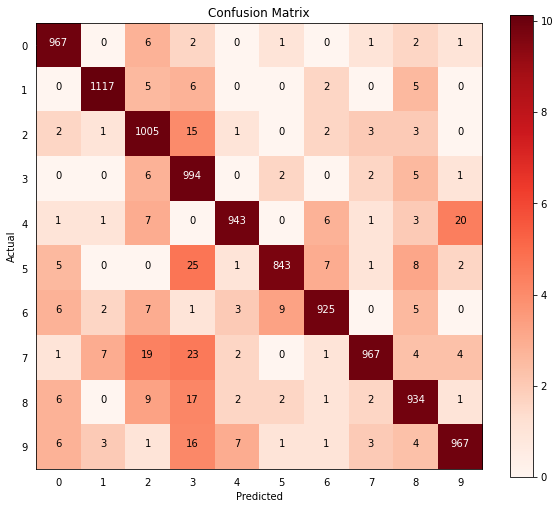

In [62]:
f = plt.figure(figsize=(10,8.5))
f.add_subplot(111)

plt.imshow(np.log2(confusion_matrix+1),cmap="Reds")
plt.colorbar()
plt.tick_params(size=5,color="white")
plt.xticks(np.arange(0,10),np.arange(0,10))
plt.yticks(np.arange(0,10),np.arange(0,10))

threshold = confusion_matrix.max()/2 

for i in range(10):
    for j in range(10):
        plt.text(j,i,int(confusion_matrix[i,j]),horizontalalignment="center",color="white" if confusion_matrix[i, j] > threshold else "black")
        
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig("Confusion_matrix1.png")
plt.show()


Between which two classes does your model get the most confused? Which one of those is the true label and which one is the prediction? What would you do if you wanted to make fewer misclassifications of one particular class?

My model got most confused between 5 and 2, showing a error of 25 wrong classifications. 5 is the actual class and 2 is the predicted class. One way to improve the performance of a model that does the classification is to train the model with more data. Because basically, misclassification means the features of this particular sample haven't been learnt by this model. If we don't have more data to re-train your model, think about those helpful techniques, such as "data augmentation" and "Transfer Learning". They work pretty well with small datasets. Another way is to just balance the samples in each class. And if we want to increase the accuracy just take very small value for initial learning rate while defining options parameters.


### Task 3: Overfitting
Find out about overfitting by training the neural network on just the first 1000 of the 50,000 training examples, for 500 iterations. 

In [65]:
#Best Model based on the hyper parameter tuning

# Define model architecture
model = Sequential()

model.add(Dense( 100, input_shape=(784,)))
model.add(Activation('relu'))
for i in range(4):
  model.add(Dense(100))
  model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

# Compile model
sgd = SGD(lr=0.05) # Sets learning rate. 
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

X_train_new = X_train_1[:1000]
train_labels_new = train_labels[:1000]
# Fit model on training data
model.fit(X_train_new, train_labels_new,batch_size=8, epochs=500, verbose=1)

Epoch 1/500
125/125 [==============================] - 0s 1ms/step - loss: 1.8512 - accuracy: 0.3810
Epoch 2/500
125/125 [==============================] - 0s 1ms/step - loss: 0.8215 - accuracy: 0.7290
Epoch 3/500
125/125 [==============================] - 0s 1ms/step - loss: 0.5068 - accuracy: 0.8470
Epoch 4/500
125/125 [==============================] - 0s 1ms/step - loss: 0.3829 - accuracy: 0.8890
Epoch 5/500
125/125 [==============================] - 0s 1ms/step - loss: 0.2609 - accuracy: 0.9160
Epoch 6/500
125/125 [==============================] - 0s 1ms/step - loss: 0.1997 - accuracy: 0.9390
Epoch 7/500
125/125 [==============================] - 0s 1ms/step - loss: 0.0986 - accuracy: 0.9710
Epoch 8/500
125/125 [==============================] - 0s 1ms/step - loss: 0.0815 - accuracy: 0.9780
Epoch 9/500
125/125 [==============================] - 0s 1ms/step - loss: 0.0365 - accuracy: 0.9900
Epoch 10/500
125/125 [==============================] - 0s 1ms/step - loss: 0.0700 - accura

In [72]:
X_valid_new = X_valid[:200]
valid_labels_new = valid_labels[:200]
# Evaluate model on test data.
score = model.evaluate(X_valid_new, valid_labels_new, verbose=0)
# This returns only a score, so you will need to use another function for 
# extracting predicted labels for your confusion matrix. Use this line for that:
X_test_new = X_test[:200]
classes = model.predict_classes(X_test_new, batch_size=8)
print('Validation score:', score[0])
print('Validation accuracy:', score[1])

Validation score: 0.8063956499099731
Validation accuracy: 0.875


In [74]:
val_p = classes
error = 0
test_labels_1_new = test_labels_1[:200]
confusion_matrix = np.zeros([10,10])
for i in range(X_test_new.shape[0]):
    confusion_matrix[test_labels_1_new[i],val_p[i]] += 1
    if test_labels_1_new[i]!=val_p[i]:
        error +=1  
print("Confusion Matrix: \n\n" ,confusion_matrix)
print("\nErrors in validation set: " ,error)
print("\nError Persentage : " ,(error*100)/val_p.shape[0])
print("\nAccuracy : " ,100-(error*100)/val_p.shape[0])
print("\nValidation set Shape :",val_p.shape[0])

Confusion Matrix: 

 [[16.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0. 28.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 14.  0.  1.  0.  0.  1.  0.  0.]
 [ 0.  0.  1. 14.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 27.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 18.  1.  0.  0.  1.]
 [ 0.  0.  1.  0.  0.  0. 19.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0. 22.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 10.  0.]
 [ 0.  0.  0.  2.  0.  0.  0.  0.  0. 19.]]

Errors in validation set:  13

Error Persentage :  6.5

Accuracy :  93.5

Validation set Shape : 200


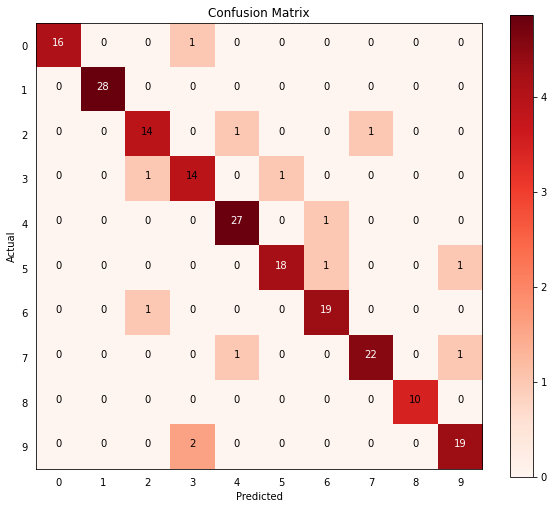

In [75]:
f = plt.figure(figsize=(10,8.5))
f.add_subplot(111)

plt.imshow(np.log2(confusion_matrix+1),cmap="Reds")
plt.colorbar()
plt.tick_params(size=5,color="white")
plt.xticks(np.arange(0,10),np.arange(0,10))
plt.yticks(np.arange(0,10),np.arange(0,10))

threshold = confusion_matrix.max()/2 

for i in range(10):
    for j in range(10):
        plt.text(j,i,int(confusion_matrix[i,j]),horizontalalignment="center",color="white" if confusion_matrix[i, j] > threshold else "black")
        
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig("Confusion_matrix1.png")
plt.show()

1. How many parameters does your neural network created in the Task 2 have?

Hyperparamters:

learning rate = 0.05

batchsize = 8

number of epochs = 3

number of hidden layers = 4

number of nodes in hidden layer = 100

number of nodes in input layer = 784

number of nodes in output layer = 10

Accuaracy obtained = 96.62


2. Find out by training the neural network on just the first 1000 of the 50,000 training examples, for 500 iterations. Write down the loss and the accuracy on the training set as well as the test set for the trained network; leave your answer in the file task3-answers.txt.

For training set, loss = 0.80, accuracy = 0.87.

For test set, loss = 0.06, accuracy = 0.93.

The accuracy dropped from 0.96(no overfitting) to 0.93 because of overfitting.

### Task 4: Visualizing a neural network
In this task, we want you to play around with neural networks in an edited version of the Tensorflow Playground, and to classify the `spiral' and the 'flower' data sets using as few layers (and number of neurons in those layers) as possible. Under the "Data" panel on the left, 'spiral' is the data set in the second row and second column, while 'flower' is the data set in the third row and first column. Use only the features X1 and X2, without regularisation. Feel free to choose your activation function, learning rate and other hyperparameters. 

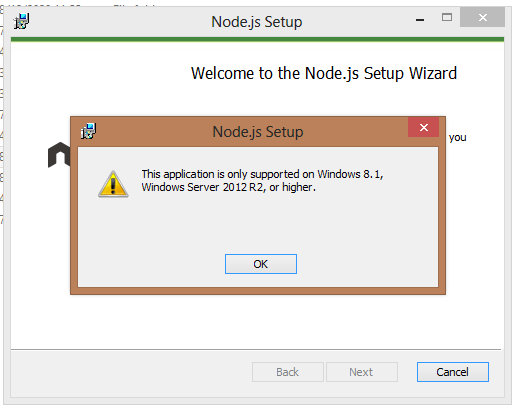

Since, I have windows 8, npm module was not getting installed showing the above mentioned error. No other compatible version was available in their official site. For that reason, I have done in task in the official tensorflow playground website. Although I hhave used spiral dataset set but for the second one, I have used the xor dataset instead of the flower dataset as the flower dataset was not available in the website.  

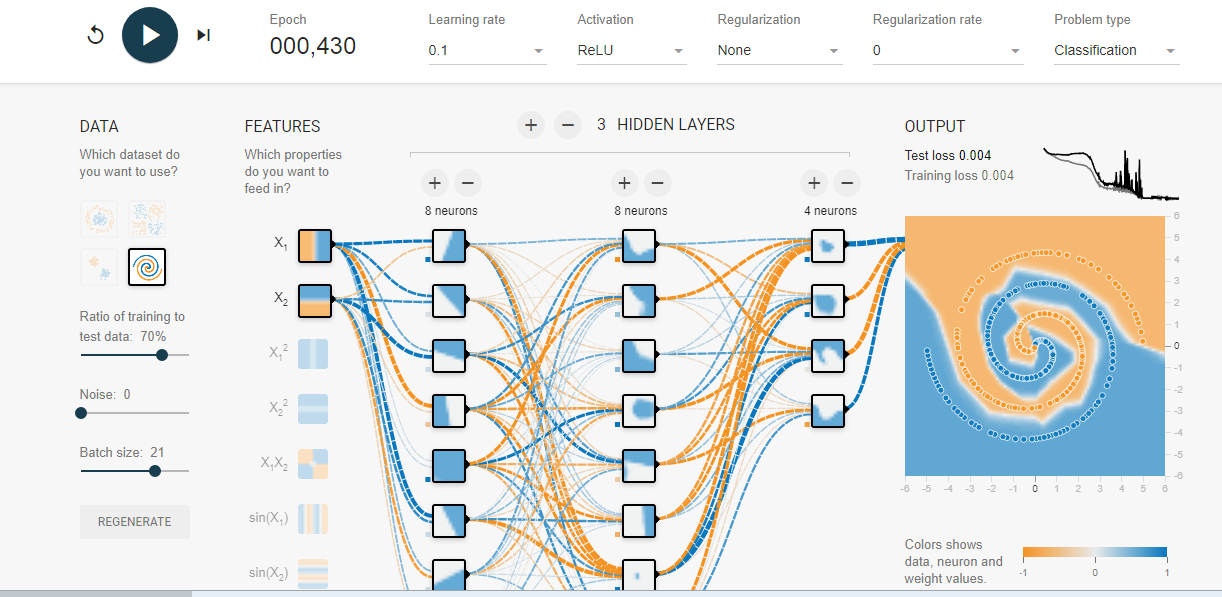

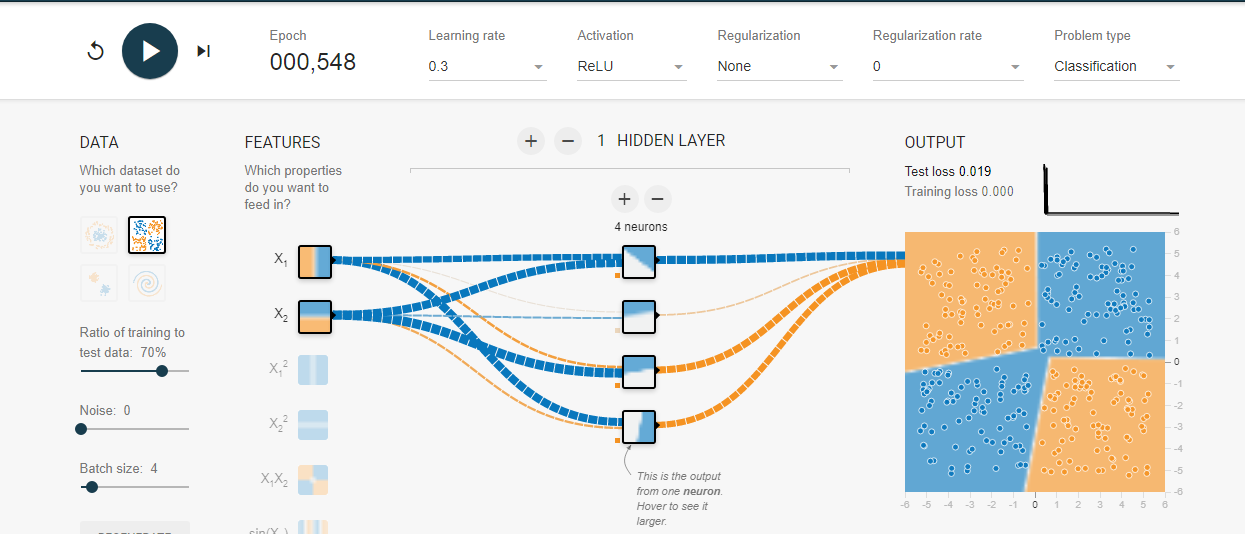

Observations:

The output layer should be greater than or equal to the input layer. At least that's what I noticed in the case of this spiral problem.
Keep the initial learning rate high, like 0.1 in this case, then as you approach a low test error like 3-5% or less, decrease the learning rate by a notch(0.03) or two. This helps in converging faster and avoids jumping around the global minima.
You can see the effects of keeping the learning rate high by checking the error graph at the top right.
For smaller batch sizes like 1, 0.1 is too high a learning rate as the model fails to converge as it jumps around the global minima.
So, if you would like to keep a high learning rate(0.1), keep the batch size high(10) as well. This usually gives a slow yet smoother convergence.
